# 크롤링 실습

In [1]:
# 필요한 라이브러리 다운로드
# 이미 설치되어 있으면 실행하지 않으셔도 됩니다

!pip3 install requests
!pip3 install bs4
!pip3 install selenium

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=3ba5292d64508a585d60a184f97e98dc3b0dfec1b25ccbe1f628306dbcc540ac
  Stored in directory: c:\users\pillgyu choi\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


### GET 요청하기

<Response [200]>


'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="제주도 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'제주도\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'제주도\'의 네이버 통합검색 결과입니다."> <title>제주도 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210812.css"> <link rel="stylesheet" type="text/css" href
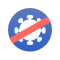
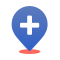
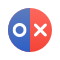
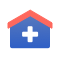

In [2]:
import requests

url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%A0%9C%EC%A3%BC%EB%8F%84&oquery=%EC%A0%9C%EC%A3%BC%EB%8F%84+%EC%97%AC%ED%96%89&tqi=htg9ydp0YiRsseJsM%2FNsssssshV-011537'
res = requests.get(url)

print(res) # 응답 객체
res.text # HTML 텍스트

#### HTTP 상태 코드
 - 1xx (정보): 요청을 받았으며 프로세스를 계속한다
 - 2xx (성공): 요청을 성공적으로 받았으며 인식했고 수용하였다
 - 3xx (리다이렉션): 요청 완료를 위해 추가 작업 조치가 필요하다
 - 4xx (클라이언트 오류): 요청의 문법이 잘못되었거나 요청을 처리할 수 없다
 - 5xx (서버 오류): 서버가 명백히 유효한 요청에 대해 충족을 실패했다

[출처: 위키피디아](https://ko.wikipedia.org/wiki/HTTP_%EC%83%81%ED%83%9C_%EC%BD%94%EB%93%9C)

In [3]:
res.status_code # HTTP 상태 코드

200

## BeautifulSoup

In [4]:
# 임시 html 텍스트
html = '''
<html>
  <head>
    <title>Example HTML</title>
  </head>
  <body>
    <div id='first' class='Example'>
      <h3 title='Good Content Title'>Contents Title</h3>
      <p>Test contents</p>
    </div>
    <div id='second' class='Example'>
      <p>Text1</p>
      <p>Text2</p>
      <p>Text3</p>
    </div>
  </body>
</html>
'''

In [5]:
from bs4 import BeautifulSoup

# 첫 번째 인자: 파싱할 객체
# 두 번째 인자: 사용할 parser(구문 분석기)
soup = BeautifulSoup(html, 'html.parser') 

### find(), find_all()
태그 검색   
- find(tag, attributes, recursive, text, keywords)   
- find_all(tag, attributes, recursive, text, limit, keywords)   

### get_text()
태그 내 텍스트 반환(부모 태그의 경우 자식 태그의 텍스트를 모두 반환)

In [6]:
tag = soup.find('h3')
print(tag)
tag.get_text()

<h3 title="Good Content Title">Contents Title</h3>


'Contents Title'

In [7]:
tag = soup.find('p')
print(tag)
tag.get_text()

<p>Test contents</p>


'Test contents'

In [8]:
# find_all은 list 형태로 값 반환
soup.find_all('p')

[<p>Test contents</p>, <p>Text1</p>, <p>Text2</p>, <p>Text3</p>]

In [9]:
soup.find_all('p')[2].get_text()

'Text2'

In [10]:
# 개수 제한
soup.find_all('p', limit=2)

[<p>Test contents</p>, <p>Text1</p>]

In [11]:
# 여러 태그
soup.find_all({'p', 'h3'})

[<h3 title="Good Content Title">Contents Title</h3>,
 <p>Test contents</p>,
 <p>Text1</p>,
 <p>Text2</p>,
 <p>Text3</p>]

In [12]:
# 해당 태그가 여러 개일 경우 첫번째 태그 반환
soup.find('div')

<div class="Example" id="first">
<h3 title="Good Content Title">Contents Title</h3>
<p>Test contents</p>
</div>

In [13]:
# 특정 속성을 가진 태그 검색
soup.find('div', {'id': 'second'})

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

In [14]:
# keyword 매개변수 이용
soup.find('div', id='second')

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

In [15]:
# 속성이 여러 개일 경우
attrs = {
    'id': 'second',
    'class': 'Example'
}
soup.find('div', attrs)

<div class="Example" id="second">
<p>Text1</p>
<p>Text2</p>
<p>Text3</p>
</div>

### 간단한 예제

네이버 검색 데이터 추출


[예제 URL](https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%A0%9C%EC%A3%BC%EB%8F%84)

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="제주도 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'제주도'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'제주도'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>제주도 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210812.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic
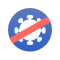
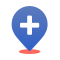
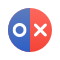
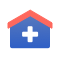

In [25]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%A0%9C%EC%A3%BC%EB%8F%84'
res = requests.get(url)

# 첫번째 인자를 텍스트로 넣어줘야 함
soup = BeautifulSoup(res.text, 'html.parser')
soup

In [26]:
title = soup.find('a')
title

<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>

In [27]:
title.get_text()

'메뉴 영역으로 바로가기'

In [28]:
# keyword로 class를 사용할 때는 _를 붙여주어야 함
# 파이썬의 클래스와 중복되기 떼문
title = soup.find_all('a', class_="api_txt_lines total_tit")
title

[]

In [24]:
# 배열에 저장
all_title = [item.get_text() for item in title]
all_title

[]

## Selenium

In [29]:
import os
os.getcwd()

'C:\\Users\\Pillgyu Choi\\Desktop'

In [30]:
!pip install selenium

In [31]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# path 변수에 자신의 chromedriver가 있는 파일 위치를 할당
# window : ~/chromedriver.exe
# mac : ~/chromedriver (.exe 빼기) 
# path = 'C:/Users/bluea/chromedriver.exe'
# driver = webdriver.Chrome(path)
driver = webdriver.Chrome('C:/Users/Pillgyu Choi/Desktop/chromedriver.exe')

In [ ]:
'''
# webdriver에 옵션 적용 가능
options = webdriver.ChromeOptions()

# 브라우저 창이 안뜨고 실행
options.add_argument('headless')
# 브라우저 사이즈 설정
options.add_argument('window-size=1920x1080')

# 옵션 적용
driver = webdriver.Chrome(path, options=options)
'''

In [32]:
driver.get('https://www.naver.com/')

# id 속성으로 검색창 찾기
search = driver.find_element_by_id('query')

# 검색어 입력
search.send_keys('제주도')
# Keys.RETURN = Enter 입력
search.send_keys(Keys.RETURN)


# a 태그의 텍스트로 찾기
search = driver.find_element_by_link_text('이미지')
# 클릭
search.click()

\* 셀레니움 사용 시 브라우저에서 해당 웹 페이지의 요소들을 로드하는 데 시간이 좀 걸리기 때문에, element가 존재하지 않는다는 error가 발생할 수 있다.   
그럴 경우 해당 요소가 전부 준비가 될 때까지 대기해야 한다.

```python
driver.implicitly_wait(time_to_wait=5)
```
-> 찾으려는 element가 로드될 때까지 지정한 시간만큼 대기할 수 있도록 설정   
위 방법은 암시적 대기 방식으로, webdriver에 영구적으로 작용된다.   
time_to_wait=5: 5초까지 기다림

https://workingwithpython.com/selenium-waits/

In [33]:
driver.get('https://finance.naver.com/')

all_title=[]

for i in range(1,5):
    # css 선택자로 찾기
    # 크롬 개발자 도구에서 copy selector를 이용하면 편함
    css = '#content > div.article > div.section > div.news_area > div > ul > li:nth-child(' + str(i) + ') > span > a'
    content = driver.find_element_by_css_selector(css)
    all_title.append(content.text)

print(all_title)

['[유럽개장]장 초반 혼조…英 0.26%↓·獨 0.02%↑', '[마켓뷰] 코스피, 반도체 업황 우려에 3200선 간신히 유지', '[시황종합]외인 1.8조 팔자에 코스피 3200선 후퇴…三電·하이닉스↓', '[Asia마감]"차익 실현부터"…日·中 모두 약보합세']


### CSS Selector
HTML 요소를 선택해주는 요소
- 태그 선택자
- 클래스 선택자(.)
- ID 선택자(#)
- 자식 선택자(>)
- 하위 선택자( )

In [34]:
# 현재 열려있는 페이지 url 찾기
url = driver.current_url
url

'https://finance.naver.com/'

In [35]:
# 브라우저 닫기
driver.close()

## 크롤링 예제

cine21 배우 랭킹 사이트 크롤링
  - 사이트 주소: http://www.cine21.com/rank/person/
  - 요청 방식 확인 방법: 크롬 개발자 모드로 들어가서, Network -> Fetch/XHR -> content 페이지의 요청 방식 확인
    - Request URL: http://www.cine21.com/rank/person/content
    - Request Method: POST
    - Form data
      - section = 'actor'
      - period_start = '2021-07'
      - gender = 'all'
      - page = 1 

In [36]:
import re
import requests
from bs4 import BeautifulSoup

In [37]:
cine21_url = 'http://www.cine21.com/rank/person/'
res = requests.get(cine21_url)
print(res.text) # get으로 할 경우 배우 리스트가 응답으로 반환되지 않음(사이트마다 다름)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
	<meta property="fb:pages" content="1641311652800771" />
<meta name="google-site-verification" content="vTM0gmeRzJwn1MIM1LMSp3cxP_SaBzch1ziRY255RHw" />	
	<meta name="google-site-verification" content="5yOe6b_e_3rr7vNDwgXJw_8wLZQGx4lJ_V48KNPrqkA" />
	<meta name="naver-site-verification" content="20defde86fc4464f2693891567a98905bd0a60d1" />
	<meta name='dailymotion-domain-verification' content='dmds9ks357rhqvdnk' />
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<title>씨네21</title>
	<link rel="stylesheet" type="text/css" media="all" href="/inc/www/css/default1.css" />
	<link rel="stylesheet" type="text/css" media="all" href="/inc/www/css/content1.css" />
	<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.12.0/jquery.min.js"></scr

### 크롤링 주소 요청
dictionary를 이용하여 form data 생성   
request모듈의 post 함수를 이용하여 요청 전송

- 첫 번째 인자: 요청 url
- 두 번째 인자: form data

In [38]:
cine21_url = 'http://www.cine21.com/rank/person/content'
post_data = dict()
post_data['section'] = 'actor'
post_data['period_start'] = '2021-07'
post_data['gender'] = 'all'
post_data['page'] = 1

res = requests.post(cine21_url, data=post_data)

In [39]:
res.text

'\t\t\t<ul class="people_list">\r\n\t\t\t\t<li class="people_li">\r\n\t\t\t\t\t<a href="/db/person/info/?person_id=57423"><img src="https://image.cine21.com/resize/cine21/person/2019/0410/18_00_45__5cadb0bd79e87[X145,145].jpg" alt="" class="people_thumb" target="_blank" /></a>\r\n\t\t\t\t\t<div class="name"><a href="/db/person/info/?person_id=57423">김윤석(1편)</a></div>\r\n\t\t\t\t\t<ul class="num_info">\r\n\t\t\t\t\t\t<li><span class="tit">흥행지수</span><strong>138,669</strong></li>\r\n\t\t\t\t\t\t<!--\r\n\t\t\t\t\t\t<li><a href="#" class="btn_graph"><span class="ico"></span><span>흥행성적<br />그래프로 보기</span></a></li>\r\n\t\t\t\t\t\t-->\r\n\t\t\t\t\t</ul>\r\n\t\t\t\t\t<!-- 영화포스터는 최대 5개까지만 -->\r\n\t\t\t\t\t<ul class="mov_list">\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t<li>\r\n\t\t\t\t\t\t\t\t<a href="/movie/info/?movie_id=57275">\r\n\t\t\t\t\t\t\t\t\t<img src="https://image.cine21.com/resize/cine21/poster/2021/0728/15_15_08__6100f5eca274b[X85,120].jpg" alt="" class="thumb"  target="_blank" />\r\n\t\t\t\

In [40]:
soup = BeautifulSoup(res.text, 'html.parser')

### 배우 이름 추출

In [41]:
# select(): find_all()과 동일한 작동을 하는 함수
# 차이점은 파라미터로 css selector를 사용
# 좀 더 간편하다
soup.select('li.people_li div.name') # class가 people_li인 li 태그 중 class가 name인 div 태그 list

[<div class="name"><a href="/db/person/info/?person_id=57423">김윤석(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=16259">조인성(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=2425">허준호(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=82573">김소진(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=64972">정만식(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=98611">조우진(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=71787">구교환(2편)</a></div>]

In [42]:
actors = soup.select('li.people_li div.name')
for actor in actors:
    print(actor.text)

김윤석(1편)
조인성(1편)
허준호(2편)
김소진(2편)
정만식(1편)
조우진(2편)
구교환(2편)


이름만 추출할 수 없을까? -> 정규표현식 사용

In [43]:
test_data = '조우진(2편)'
# re.sub(정규 표현식, 치환 문자, 대상 문자열)
re.sub('\(\w*\)', '', test_data) # \w: 문자, 숫자와 매치

'조우진'

In [44]:
actors = soup.select('li.people_li div.name')
for actor in actors:
    print(re.sub('\(\w*\)', '', actor.text))

김윤석
조인성
허준호
김소진
정만식
조우진
구교환


### 배우 상세 정보 추출

In [45]:
actors = soup.select('li.people_li div.name')
# select_one(): find()와 대응되는 함수
for actor in actors:
    print (actor.select_one('a'))

<a href="/db/person/info/?person_id=57423">김윤석(1편)</a>
<a href="/db/person/info/?person_id=16259">조인성(1편)</a>
<a href="/db/person/info/?person_id=2425">허준호(2편)</a>
<a href="/db/person/info/?person_id=82573">김소진(2편)</a>
<a href="/db/person/info/?person_id=64972">정만식(1편)</a>
<a href="/db/person/info/?person_id=98611">조우진(2편)</a>
<a href="/db/person/info/?person_id=71787">구교환(2편)</a>


In [46]:
actors = soup.select('li.people_li div.name')
actors_info_list = list()

for actor in actors:
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href'] # 태그 내 속성 접근
    response_actor = requests.get(actor_link) # 배우 상세 페이지 이동
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    print(actor_details)

[<li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1968-01-21</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">신장/체중</span>178cm, 68kg</li>, <li><span class="tit">학교</span>동의대학교 학사</li>, <li><span class="tit">취미</span>여행, 낚시</li>, <li><span class="tit">소속사</span>심엔터테인먼트</li>]
[<li><span class="tit">다른 이름</span>趙寅成</li>, <li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1981-07-28</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">신장/체중</span>186cm, 72kg</li>, <li><span class="tit">학교</span>전남과학대 모델이벤트과 - 동국대 연극영화 (중퇴)</li>, <li><span class="tit">취미</span>모자모으기, 영화보기, 농구</li>, <li><span class="tit">특기</span>농구, 태권도(공인 4단)</li>, <li><span class="tit">소속사</span>싸이더스 HQ</li>]
[<li><span class="tit">원어명</span>許俊豪</li>, <li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1964-03-03</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">신장/체중</span>180cm, 75kg</li>, <li><span class

배우마다 가지고 있는 정보가 다르다!   
-> dictionary 형태로 저장

In [47]:
actors = soup.select('li.people_li div.name')
actors_info_list = list()

for actor in actors:
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href'] # 태그 내 속성 접근
    response_actor = requests.get(actor_link) # 배우 상세 페이지 이동
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    
    actor_info_dict = dict()
    
    for actor_detail in actor_details:
        actor_detail_key = actor_detail.select_one('span.tit').text # 상세정보 key값
        actor_detail_value = re.sub('<span.*>.*</span>', '', str(actor_detail)) # span 태그 제거
        actor_detail_value = re.sub('<.*?>', '', actor_detail_value) # 상세정보 value값
        actor_info_dict[actor_detail_key] = actor_detail_value
        
    actors_info_list.append(actor_info_dict)

actors_info_list

[{'직업': '배우',
  '생년월일': '1968-01-21',
  '성별': '남',
  '신장/체중': '178cm, 68kg',
  '학교': '동의대학교 학사',
  '취미': '여행, 낚시',
  '소속사': '심엔터테인먼트'},
 {'다른 이름': '趙寅成',
  '직업': '배우',
  '생년월일': '1981-07-28',
  '성별': '남',
  '신장/체중': '186cm, 72kg',
  '학교': '전남과학대 모델이벤트과 - 동국대 연극영화 (중퇴)',
  '취미': '모자모으기, 영화보기, 농구',
  '특기': '농구, 태권도(공인 4단)',
  '소속사': '싸이더스 HQ'},
 {'원어명': '許俊豪',
  '직업': '배우',
  '생년월일': '1964-03-03',
  '성별': '남',
  '신장/체중': '180cm, 75kg',
  '학교': '서울예술대학 연극과',
  '취미': '만화책 보기',
  '특기': '야구, 농구',
  '소속사': '지티비엔터테인먼트'},
 {'직업': '배우', '성별': '여'},
 {'직업': '배우', '성별': '남'},
 {'다른 이름': '조신제', '직업': '배우', '생년월일': '1979-01-16', '성별': '남'},
 {'직업': '배우', '생년월일': '1982-12-14', '성별': '남'}]

### 특수한 정규 표현식
Greedy(.*) vs Non-Greedy(.*?)
- . 문자는 개행 문자를 제외한 모든 문자 한개를 의미
- \* 문자는 앞 문자가 0번 이상 반복되는 패턴
- ? 문자는 패턴에 여러 개가 포함될 경우 가장 적은 개수만 포함되도록 함

```html
<li><span class="tit">직업</span>배우</li>
  - <.*> -> <li><span class="tit">원어명</span>주지훈</li>
  - <.*?> -> <li>
```

### 최종 코드

In [48]:
actors_info_list = list()
actors = soup.select('li.people_li div.name')

for index, actor in enumerate(actors):
    actor_info_dict = dict()
    actor_name = re.sub('\(\w*\)', '', actor.text)
    actor_info_dict['이름'] = actor_name
    
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href']
    response_actor = requests.get(actor_link)
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    
    for actor_detail in actor_details:
        actor_detail_key = actor_detail.select_one('span.tit').text
        actor_detail_value = re.sub('<span.*>.*</span>', '', str(actor_detail))
        actor_detail_value = re.sub('<.*?>', '', actor_detail_value)
        actor_info_dict[actor_detail_key] = actor_detail_value
        
    actors_info_list.append(actor_info_dict)

actors_info_list

[{'이름': '김윤석',
  '직업': '배우',
  '생년월일': '1968-01-21',
  '성별': '남',
  '신장/체중': '178cm, 68kg',
  '학교': '동의대학교 학사',
  '취미': '여행, 낚시',
  '소속사': '심엔터테인먼트'},
 {'이름': '조인성',
  '다른 이름': '趙寅成',
  '직업': '배우',
  '생년월일': '1981-07-28',
  '성별': '남',
  '신장/체중': '186cm, 72kg',
  '학교': '전남과학대 모델이벤트과 - 동국대 연극영화 (중퇴)',
  '취미': '모자모으기, 영화보기, 농구',
  '특기': '농구, 태권도(공인 4단)',
  '소속사': '싸이더스 HQ'},
 {'이름': '허준호',
  '원어명': '許俊豪',
  '직업': '배우',
  '생년월일': '1964-03-03',
  '성별': '남',
  '신장/체중': '180cm, 75kg',
  '학교': '서울예술대학 연극과',
  '취미': '만화책 보기',
  '특기': '야구, 농구',
  '소속사': '지티비엔터테인먼트'},
 {'이름': '김소진', '직업': '배우', '성별': '여'},
 {'이름': '정만식', '직업': '배우', '성별': '남'},
 {'이름': '조우진', '다른 이름': '조신제', '직업': '배우', '생년월일': '1979-01-16', '성별': '남'},
 {'이름': '구교환', '직업': '배우', '생년월일': '1982-12-14', '성별': '남'}]

In [51]:
#도저히 크롤링 코드 스스로 못짜서 다른분이 한거 참고했습니다. 죄송합니다. 도저히 못짜겠습니다.
actors_info_list = list()
for i in range(1,11):
    url = 'http://www.cine21.com/rank/person/content'
    post_data = dict()
    post_data['section'] = 'actor'
    post_data['period_start'] = '2021-08'
    post_data['gender'] = 'all'
    post_data['page'] = i

    res = requests.post(url, data=post_data)
    soup = BeautifulSoup(res.text, 'html.parser')
    Scores = soup.select("li.people_li ul.num_info li strong")
    movies = soup.select("li.people_li ul.mov_list")
    ranks = soup.select("li.people_li>span")
    actors = soup.select("li.people_li div.name")

    for index, actor in enumerate(actors):
        actor_info_dict = dict()
        actor_name = re.sub('\(\w*\)', '', actor.text)
        actor_info_dict['이름'] = actor_name
        actor_info_dict['흥행지수'] = Scores[index].text
        
        tmp = movies[index].text.strip()
        tmp = re.sub("\n\n\n\n\n\n",',',tmp)
        tmp = tmp.split(',')
        actor_info_dict['출연영화'] = tmp
        actor_info_dict['랭킹'] = ranks[index].text
        actor_link = 'http://www.cine21.com' + actor.select_one('a')['href']
        response_actor = requests.get(actor_link)
        soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
        default_info = soup_actor.select_one('ul.default_info')
        actor_details = default_info.select('li')
        

        for actor_detail in actor_details:
            actor_detail_key = actor_detail.select_one('span.tit').text
            actor_detail_value = re.sub('<span.*>.*</span>', '', str(actor_detail))
            actor_detail_value = re.sub('<.*?>', '', actor_detail_value)
            actor_info_dict[actor_detail_key] = actor_detail_value

        actors_info_list.append(actor_info_dict)
    
    

actors_info_list


[{'이름': '김윤석',
  '흥행지수': '182,691',
  '출연영화': ['모가디슈'],
  '랭킹': '1',
  '직업': '배우',
  '생년월일': '1968-01-21',
  '성별': '남',
  '신장/체중': '178cm, 68kg',
  '학교': '동의대학교 학사',
  '취미': '여행, 낚시',
  '소속사': '심엔터테인먼트'},
 {'이름': '조인성',
  '흥행지수': '159,855',
  '출연영화': ['모가디슈'],
  '랭킹': '2',
  '다른 이름': '趙寅成',
  '직업': '배우',
  '생년월일': '1981-07-28',
  '성별': '남',
  '신장/체중': '186cm, 72kg',
  '학교': '전남과학대 모델이벤트과 - 동국대 연극영화 (중퇴)',
  '취미': '모자모으기, 영화보기, 농구',
  '특기': '농구, 태권도(공인 4단)',
  '소속사': '싸이더스 HQ'},
 {'이름': '허준호',
  '흥행지수': '137,018',
  '출연영화': ['모가디슈'],
  '랭킹': '3',
  '원어명': '許俊豪',
  '직업': '배우',
  '생년월일': '1964-03-03',
  '성별': '남',
  '신장/체중': '180cm, 75kg',
  '학교': '서울예술대학 연극과',
  '취미': '만화책 보기',
  '특기': '야구, 농구',
  '소속사': '지티비엔터테인먼트'},
 {'이름': '김소진',
  '흥행지수': '114,182',
  '출연영화': ['모가디슈'],
  '랭킹': '4',
  '직업': '배우',
  '성별': '여'},
 {'이름': '정만식',
  '흥행지수': '91,345',
  '출연영화': ['모가디슈'],
  '랭킹': '5',
  '직업': '배우',
  '성별': '남'},
 {'이름': '구교환',
  '흥행지수': '68,512',
  '출연영화': ['모가디슈', '메기'],
  '랭킹': '6',
  '직업':